In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,load_model, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from PIL import Image
import time
%matplotlib inline

Using TensorFlow backend.


In [49]:
img_width, img_height = 224, 224
train_data_dir = r"C:\Users\narendra\Documents\HPRC_work\flower_photos"
validation_data_dir = r"C:\Users\narendra\Documents\HPRC_work\flower_photos"
nb_train_samples = 3670
nb_validation_samples = 300
batch_size = 16
epochs = 10

In [50]:
# import a model trained with Imagenet
model = keras.applications.mobilenet.MobileNet(input_shape=(img_width, img_height, 3), alpha=0.5,
                                               include_top=False, weights='imagenet')

In [51]:
# Freeze the layers which you don't want to train.
for layer in model.layers:
    layer.trainable = False

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 16)      432       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 16)      64        
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 16)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 16)      144       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 16)      64        
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 112, 112, 16)      0         
__________

In [52]:
#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.2)(x)
predictions = Dense(5, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 16)      432       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 16)      64        
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 16)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 16)      144       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 16)      64        
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 112, 112, 16)      0         
__________

c:\users\narendra\.conda\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`


In [53]:
# compile model
model_final.compile(loss = "categorical_crossentropy", 
                    optimizer = keras.optimizers.adam(lr=0.0001),
                    metrics=["accuracy"])

In [54]:
# Initiate the train and test generators with data Augumentation 
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

Found 3670 images belonging to 5 classes.
Found 3670 images belonging to 5 classes.


In [55]:
# Save the model according to the conditions  
checkpoint = ModelCheckpoint("transfer_mobilenet.h5", monitor='val_acc', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [56]:
# Train the model 
model_final.fit_generator(
train_generator,
samples_per_epoch = nb_train_samples,
epochs = epochs,
validation_data = validation_generator,
nb_val_samples = nb_validation_samples,
callbacks = [checkpoint, early])

Epoch 1/10
228/229 [============================>.] - ETA: 2s - loss: 1.5723 - acc: 0.4638

c:\users\narendra\.conda\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
c:\users\narendra\.conda\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=229, validation_data=<keras.pre..., callbacks=[<keras.ca..., validation_steps=300, epochs=10)`


KeyboardInterrupt: 

(224, 224, 3)


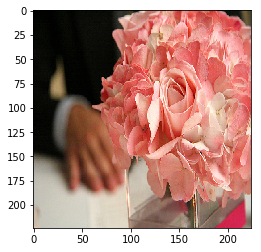

In [36]:
IM = Image.open(train_data_dir + r'\roses\165985535_7178ce6350.jpg')
npim = np.array(IM.resize((img_height, img_width), Image.NEAREST))
print(npim.shape)
plt.imshow(npim)
npim = npim.reshape((1,img_height, img_width,3))

In [37]:
model_final.predict(npim)

array([[ 0.19880228,  0.21099184,  0.17333618,  0.20360319,  0.21326651]], dtype=float32)